In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from pipeoptz import Pipeline, Node, NodeFor

In [2]:
def add(x, y):
    print(f"add({x}, {y})")
    return x + y

In [3]:
# Create a pipeline
pipeline = Pipeline("For Loop Test")
# Create a pipeline to be executed in a for loop
for_pipeline = Pipeline("For Loop")

# Add a node to the main pipeline
pipeline.add_node(Node("A", add), predecessors={"x":"run_params:x","y":"run_params:y"})
# Add a node to the for loop pipeline
for_pipeline.add_node(Node("B", add, fixed_params={"x":1}), predecessors={"y":"run_params:loop_var"})
# Add a second node to the for loop pipeline
for_pipeline.add_node(Node("C", add), predecessors={"x": "B", "y":"run_params:loop_var"})
# Add a for loop node to the main pipeline
pipeline.add_node(NodeFor("For Test", for_pipeline, {"iterations":4}), predecessors={"loop_var":"A"})
# Add a node to the main pipeline
pipeline.add_node(Node("D", add), predecessors={"x":"For Test","y":"run_params:y"})

In [4]:
print("Topological order:", pipeline.static_order())

Topological order: ['A', 'For Test', 'D']


In [5]:
# Run the pipeline with parameters
outputs = pipeline.run({"x":5, "y":1}, debug=True)
print("Pipeline results:", outputs[1][outputs[0]], "\n" , outputs, "\n")

Executing node: A
add(5, 1)
Executing node: For Test
Executing node: For Test iteration 1/4
Executing node: B
add(1, 6)
Executing node: C
add(7, 6)
Executing node: For Test iteration 2/4
Executing node: B
add(1, 13)
Executing node: C
add(14, 13)
Executing node: For Test iteration 3/4
Executing node: B
add(1, 27)
Executing node: C
add(28, 27)
Executing node: For Test iteration 4/4
Executing node: B
add(1, 55)
Executing node: C
add(56, 55)
Executing node: D
add(111, 1)
Pipeline results: 112 
 ('D', {'A': 6, 'For Test': 111, 'D': 112}, (0.0011472702026367188, {'A': 0.0005528926849365234, 'For Test': 0.000553131103515625, 'D': 4.124641418457031e-05})) 



Generated .json .dot .png files.


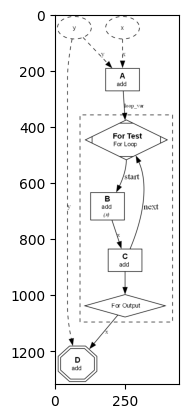

In [6]:
pipeline.to_json("for.json")
pipeline.to_dot("for.dot")
pipeline.to_image("for.png")
print("Generated .json .dot .png files.")
plt.imshow(Image.open("for.png"))

In [7]:
print("\nLoading pipeline from JSON and executing:")
# Load the pipeline from a json file
loaded_pipeline = Pipeline.from_json("for.json")
# Run the loaded pipeline
loaded_outputs = loaded_pipeline.run({"x":5, "y":1})
print("Pipeline results loaded from JSON:", loaded_outputs)


Loading pipeline from JSON and executing:
add(5, 1)
add(1, 6)
add(7, 6)
add(1, 13)
add(14, 13)
add(1, 27)
add(28, 27)
add(1, 55)
add(56, 55)
add(111, 1)
Pipeline results loaded from JSON: ('D', {'A': 6, 'For Test': 111, 'D': 112}, (0.00043845176696777344, {'A': 8.821487426757812e-05, 'For Test': 0.00030517578125, 'D': 4.506111145019531e-05}))
